
**By : Rendra Dwi Prasetyo**



### Load Data & Explore Data

In [ ]:
import pandas as pd

In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/MID_EXAM/Text_Mining/Dataset/data_1C.csv',index_col=0)

# index_col = 0, supaya kolom pertama di file csv tidak jadi kolom tersendiri (tapi jadi index dari dataframe)

In [ ]:
DF

,text,label
0,"Aurion C3 Iron Curl Bar with 2 Locks, 3 ft (Si...",Household
1,"Presto 06620 11-Inch Electric Skillet Fries, g...",Household
2,WHOOSH! Award-Wining Screen Cleaner - Safe for...,Electronics
3,ManQ Men's Blended Waist Coat,Clothing & Accessories
4,Lace And Me Women's Blended High Waist Tummy &...,Clothing & Accessories
...,...,...
12601,The Art of War Written around the 6th century ...,Books
12602,How to be a Brit: Includes the Classic Bestsel...,Books
12603,Rupa Jon Boys' Cotton Brief (Pack of 5) (Color...,Clothing & Accessories
12604,Urban Crafts India Silver Plated Brass Bowl fo...,Household


**Data berupa text dalam bahasa Inggris**

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12606 entries, 0 to 12605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12606 non-null  object
 1   label   12606 non-null  object
dtypes: object(2)
memory usage: 295.5+ KB


In [ ]:
# melihat jenis-jenis label dan jumlahnya
DF['label'].value_counts()

,count
label,
Household,4831
Books,2961
Electronics,2670
Clothing & Accessories,2144


Data label menunjukan bukan tipe data ordinal, jadi 1 label dan label lainya itu independent (tidak ada urutan atau tingkatan antara label).

In [ ]:
# check null/missing value
DF.isna().sum()

,0
text,0
label,0


data aman dari null value

### **a. Preprocessing**

Library untuk preprocessing

In [ ]:
import nltk
nltk.download('wordnet') # untuk kosakata bahasa Inggris
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text) # hapus URLs
    text = re.sub(r'\W', ' ', text)  # Hapus simbol / special character
    text = re.sub(r'\s+',' ',text) # Disini saya hapus kalau ada double white space
    text = text.lower()  # Ubah ke lowercase (Case Folding)
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    return ' '.join(text)

DF['cleaned_text'] = DF['text'].apply(preprocess_text)

Penjelasan:

Setelah explorasi dataset tadi saya mengetahui bahwa data text dalam **bahasa Inggris** jadi perangkat library yang saya gunakan basic language nya bahas Inggris  

1. Tokenisasi:
Membagi teks menjadi kata-kata atau token individu. Contohnya "Text mining" jadi "text" dan "mining"

2. Penghapusan Stopwords: Menghapus kata-kata yang umum dan tidak memberikan banyak informasi. Contohnya "and", "or", "then"

3. Pengahpusan double white space : Contohnya "rendra‎ ‎ dwi" jadi "rendra dwi", lalu saya juga hapus simbol dan link jika ada di dalam text

3. Lemmatization konsepnya seperti stemming yang mengubah kata menjadi bentuk dasarnya.
Contohnya: "teaching" menjadi "teach".

Tapi disini saya tidak pakai stemming, melainkan **lemitization**, karena lebih memperhatikan konteks morfologi dan tata bahasa, dimana hasilnya akan lebih tepat daripada stemming.



In [ ]:
# melihat hasil preprocessing
DF

,text,label,cleaned_text
0,"Aurion C3 Iron Curl Bar with 2 Locks, 3 ft (Si...",Household,aurion c3 iron curl bar 2 lock 3 ft silver 21 ...
1,"Presto 06620 11-Inch Electric Skillet Fries, g...",Household,presto 06620 11 inch electric skillet fry gril...
2,WHOOSH! Award-Wining Screen Cleaner - Safe for...,Electronics,whoosh award wining screen cleaner safe screen...
3,ManQ Men's Blended Waist Coat,Clothing & Accessories,manq men blended waist coat
4,Lace And Me Women's Blended High Waist Tummy &...,Clothing & Accessories,lace woman blended high waist tummy thigh shap...
...,...,...,...
12601,The Art of War Written around the 6th century ...,Books,art war written around 6th century bc art war ...
12602,How to be a Brit: Includes the Classic Bestsel...,Books,brit includes classic bestseller alien review ...
12603,Rupa Jon Boys' Cotton Brief (Pack of 5) (Color...,Clothing & Accessories,rupa jon boy cotton brief pack 5 color may vary
12604,Urban Crafts India Silver Plated Brass Bowl fo...,Household,urban craft india silver plated brass bowl diw...


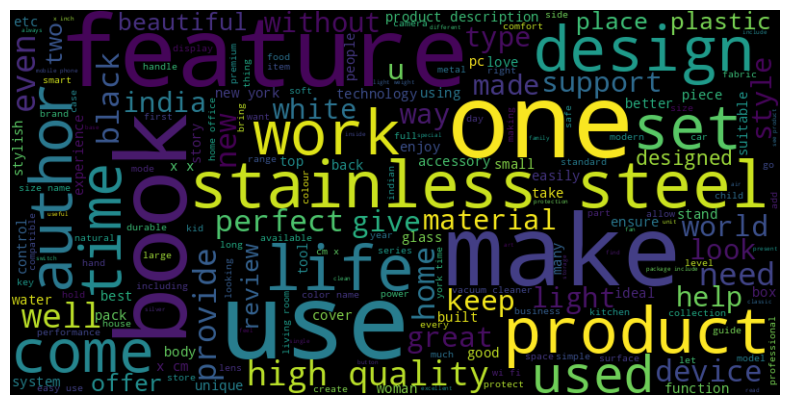

In [ ]:
# visualisasi dengan wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(DF['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear") # bilinear itu supaya gambarnya halus dan tidak pecah-pecah
plt.axis('off')
plt.show()

**Splitting dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = DF['cleaned_text'] # text yang sudah di processing
y = DF['label']  # label jadi target, yang sudah saya identifikasi tadi ada 4 macam label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #traininng 80% dan 20% data buat testing

### **b. Modeling algorthm klasifikasi**

#### Metode Vectorisasi

Metode vectorisasi yang saya pakai ada 2:


*   Metode 1 : TF-IDF
*   Metode 2 : Bag of Word (BoW)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Metode 1: TF-IDF
tfidf_vectorizer = TfidfVectorizer() # object untuk melakuakn vektorisasi TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) #menerapkan TF-IDF untuk training data
X_test_tfidf = tfidf_vectorizer.transform(X_test) #menerapkan TF-IDF untuk data testing data

In [ ]:
# Metode 2: Bag of Words (BoW)
bow_vectorizer = CountVectorizer() # object untuk melakuakn vektorisasi Bag of word
X_train_bow = bow_vectorizer.fit_transform(X_train) #menerapkan BoW untuk training data
X_test_bow = bow_vectorizer.transform(X_test) #menerapkan BoW untuk data testing data

TF-IDF = Hasil perkalian dari nilai TF(frekuensi kata) dan IDF(menghitung seberapa penting suatu kata dalam keseluruhan kumpulan data).

Bow = hasil perhitungan frekuensi dari kemunculan kata dalam sekumpulan data.

In [ ]:
print(X_train_tfidf.shape)
print(X_train_bow.shape)

(10084, 39628)
(10084, 39628)


hasil dimensi vectorisasi TFIDF maapun Bag of Word untuk data training cukup besar dengan 10084 sampel teks dan 39628 fitur

#### **MODEL**

##### **I. Dengan metode vectorisasi 1 : TF-IDF**

###### **1. SVM**

Dengan Metode vectorisasi 1 : TF-IDF

*   Untuk mencari hyperparameter terbaik saya menggunakan GridSearchCV karena dapat bekerja dengan mencoba semua kombinasi parameter hingga mendapatkan hyperparameter yang paling optimal.
*   **Hyperparameter** yang saya pakai ada dua yaitu Kernel(linear dan rbf) dan C (antara 0,1 ,1 dan 10)
*   Cross validaton (cv) saya bagi menjadi 5 bagian fold untuk mengurangi overfitting, dan jumlah percobaan sebanyak jumlah kombinasi hyperparameter yang bisa didapatkan melalui Gridsearch.


Ini saya lakukan dengan pertimbangkan untuk mndapatkan hasil yang optimal.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Tuning Hyperparameter pertama untuk SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear','rbf']}
svm_random = GridSearchCV(SVC(), svm_params, scoring='accuracy', cv=5)
svm_random.fit(X_train_tfidf, y_train)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
# mendapatkan nilai accuracy untuk setiap kombinasi parameter yang digunakan
for mean_score, params in zip(svm_random.cv_results_['mean_test_score'], svm_random.cv_results_['params']):
    print(f"Skor: {mean_score:.5f} dengan parameter: {params}")

print(f"\nSkor Akurasi Terbaik: {svm_random.best_score_:.5f} dengan parameter: {svm_random.best_params_}")

Skor: 0.90539 dengan parameter: {'C': 0.1, 'kernel': 'linear'}
Skor: 0.73969 dengan parameter: {'C': 0.1, 'kernel': 'rbf'}
Skor: 0.95428 dengan parameter: {'C': 1, 'kernel': 'linear'}
Skor: 0.95180 dengan parameter: {'C': 1, 'kernel': 'rbf'}
Skor: 0.95200 dengan parameter: {'C': 10, 'kernel': 'linear'}
Skor: 0.95389 dengan parameter: {'C': 10, 'kernel': 'rbf'}

Skor Akurasi Terbaik: 0.95428 dengan parameter: {'C': 1, 'kernel': 'linear'}


C ini merupakan regulasi yang mengontrol trade-off antara kompleksitas model dan kesalahan pelatihan. Dari hasil yang saya dapatkan menunjukan nilai C yang terlalu rendah hasilnya tidak sebaik saat nilai C nya lebih besar, dan secara umum kernel linear lebih baik daripada rbf.

****REPORT skor untuk testing data****

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# SVM dengan TF-IDF
y_pred_svm_tfidf = svm_random.predict(X_test_tfidf)
print(classification_report(y_pred_svm_tfidf,y_test))

                        precision    recall  f1-score   support

                 Books       0.96      0.97      0.96       602
Clothing & Accessories       0.97      0.98      0.98       437
           Electronics       0.94      0.97      0.96       506
             Household       0.98      0.95      0.96       977

              accuracy                           0.96      2522
             macro avg       0.96      0.97      0.97      2522
          weighted avg       0.96      0.96      0.96      2522



- Berikut untuk nilai accuracy,precision,recall dan f1 score tanpa pembulatan :

In [ ]:
print("SVM (TF-IDF)  -> Accuracy  :", accuracy_score(y_test, y_pred_svm_tfidf))
print("SVM (TF-IDF)  -> Precision :", precision_score(y_test, y_pred_svm_tfidf, average='weighted'))
print("SVM (TF-IDF)  -> Recall    :", recall_score(y_test, y_pred_svm_tfidf, average='weighted'))
print("SVM (TF-IDF)  -> F1 Score  :", f1_score(y_test, y_pred_svm_tfidf, average='weighted'))

SVM (TF-IDF)  -> Accuracy  : 0.964710547184774
SVM (TF-IDF)  -> Precision : 0.9648734694640381
SVM (TF-IDF)  -> Recall    : 0.964710547184774
SVM (TF-IDF)  -> F1 Score  : 0.9646938251105714


######**2. Random Forest**

Dengan metode vedctorisasi 1 : TF-IDF

*   Untuk mencari hyperparameter terbaik saya menggunakan GridSearchCV karena  bekerja dengan mencoba semua kombinasi parameter hingga mendapatkan pasangan hyperparameter yang paling optimal.
*   **Hyperparameter** yang saya pakai ada dua yaitu jumlah estimasi : n_estimators(50, 100, 200) dan maksimal kedalaman (50, 100, None)  
*   Cross validaton (cv) saya bagi menjadi 5 bagian fold.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [50, 100, None]}
rf_tfidf = GridSearchCV(RandomForestClassifier(), rf_params, scoring='accuracy', cv=5)
rf_tfidf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 100, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# nilai akurasi saat training dan parameter pilihanya
for mean_score, params in zip(rf_tfidf.cv_results_['mean_test_score'], rf_tfidf.cv_results_['params']):
    print(f"Skor: {mean_score:.3f} dengan parameter: {params}")
print(f"\nSkor Akurasi Terbaik: {rf_tfidf.best_score_:.3f} dengan parameter: {rf_tfidf.best_params_}")

Skor: 0.917 dengan parameter: {'max_depth': 50, 'n_estimators': 50}
Skor: 0.921 dengan parameter: {'max_depth': 50, 'n_estimators': 100}
Skor: 0.922 dengan parameter: {'max_depth': 50, 'n_estimators': 200}
Skor: 0.928 dengan parameter: {'max_depth': 100, 'n_estimators': 50}
Skor: 0.932 dengan parameter: {'max_depth': 100, 'n_estimators': 100}
Skor: 0.933 dengan parameter: {'max_depth': 100, 'n_estimators': 200}
Skor: 0.930 dengan parameter: {'max_depth': None, 'n_estimators': 50}
Skor: 0.934 dengan parameter: {'max_depth': None, 'n_estimators': 100}
Skor: 0.935 dengan parameter: {'max_depth': None, 'n_estimators': 200}

Skor Akurasi Terbaik: 0.935 dengan parameter: {'max_depth': None, 'n_estimators': 200}


Dari hasil skor pelatihan tersebut dapat dilihat bahwa saat nilai max_depth dan n_estimator semakin tinggi, maka skor selama pelatihan semakin baik.

**REPORT skor untuk testing data**

In [ ]:
# Random Forest dengan TF-IDF
y_pred_rf_tfidf = rf_tfidf.predict(X_test_tfidf) # prediksi untuk data uji

# menampilkan score accuracy, presisi, recall dan F1
print(classification_report(y_pred_rf_tfidf,y_test))

                        precision    recall  f1-score   support

                 Books       0.95      0.95      0.95       609
Clothing & Accessories       0.95      0.98      0.96       427
           Electronics       0.89      0.95      0.92       484
             Household       0.96      0.91      0.94      1002

              accuracy                           0.94      2522
             macro avg       0.94      0.95      0.94      2522
          weighted avg       0.94      0.94      0.94      2522



In [ ]:
# untuk skor tanpa pembulatan
print("Random Forest (TF-IDF) - Accuracy:", accuracy_score(y_test, y_pred_rf_tfidf))
print("Random Forest (TF-IDF) - Precision:", precision_score(y_test, y_pred_rf_tfidf, average='weighted'))
print("Random Forest (TF-IDF) - Recall:", recall_score(y_test, y_pred_rf_tfidf, average='weighted'))
print("Random Forest (TF-IDF) - F1 Score:", f1_score(y_test, y_pred_rf_tfidf, average='weighted'))

Random Forest (TF-IDF) - Accuracy: 0.9409199048374306
Random Forest (TF-IDF) - Precision: 0.9418450537466024
Random Forest (TF-IDF) - Recall: 0.9409199048374306
Random Forest (TF-IDF) - F1 Score: 0.9409033597313929


#####  **II. Dengan metode Vectorisasi 2 : BoW (Bag of Word)**

######**1. SVM**

*   Untuk mencari hyperparameter terbaik, kali ini saya menggunakan GridSearch yang dapat melihat semua pilihan kombinasi dari parameter yang akan saya tentukan.
*   **Hyperparameter** yang saya pakai ada dua yaitu Kernel(linear dan rbf) dan C (antara 0,1 ,1 dan 10)
*   Cross validaton (cv) saya bagi menjadi 5 bagian fold. Karena pakai gridsearch jumlah percobaan kombinasi nya sesuai total semua kombinasi yang mungkin terjadi

In [ ]:
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_bow = GridSearchCV(SVC(), svm_params, scoring='accuracy', cv=5)
svm_bow.fit(X_train_bow, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
# nilai akurasi saat training dan parameter pilihanya
for mean_score, params in zip(svm_bow.cv_results_['mean_test_score'], svm_bow.cv_results_['params']):
    print(f"Skor: {mean_score:.3f} dengan parameter: {params}")
print(f"\nSkor Akurasi Terbaik: {svm_bow.best_score_:.3f} dengan parameter: {svm_bow.best_params_}")

Skor: 0.936 dengan parameter: {'C': 0.1, 'kernel': 'linear'}
Skor: 0.730 dengan parameter: {'C': 0.1, 'kernel': 'rbf'}
Skor: 0.934 dengan parameter: {'C': 1, 'kernel': 'linear'}
Skor: 0.910 dengan parameter: {'C': 1, 'kernel': 'rbf'}
Skor: 0.932 dengan parameter: {'C': 10, 'kernel': 'linear'}
Skor: 0.932 dengan parameter: {'C': 10, 'kernel': 'rbf'}

Skor Akurasi Terbaik: 0.936 dengan parameter: {'C': 0.1, 'kernel': 'linear'}


Perbedaan paling mencolok dari hasil skor selama pelatihan itu pada kernel nya, secara umum kernel linear memberikan hasil lebih baik.

**REPORT skor untuk testing data**

In [ ]:
# SVM dengan Bag of Words
y_pred_svm_bow = svm_bow.predict(X_test_bow)

# menampilkan report hasil accuracy, precision, recall, f1-score
print(classification_report(y_pred_svm_bow,y_test))
print("SVM (BoW) -> Accuracy  :", accuracy_score(y_test, y_pred_svm_bow))

                        precision    recall  f1-score   support

                 Books       0.94      0.92      0.93       628
Clothing & Accessories       0.95      0.97      0.96       430
           Electronics       0.93      0.95      0.94       503
             Household       0.95      0.95      0.95       961

              accuracy                           0.95      2522
             macro avg       0.94      0.95      0.95      2522
          weighted avg       0.95      0.95      0.95      2522

SVM (BoW) -> Accuracy  : 0.9452815226011102


In [ ]:
print("SVM (BoW) -> Accuracy  :", accuracy_score(y_test, y_pred_svm_bow))
print("SVM (BoW) -> Precision :", precision_score(y_test, y_pred_svm_bow, average='weighted'))
print("SVM (BoW) -> Recall    :", recall_score(y_test, y_pred_svm_bow, average='weighted'))
print("SVM (BoW) -> F1 Score  :", f1_score(y_test, y_pred_svm_bow, average='weighted'))

SVM (BoW) -> Accuracy  : 0.9452815226011102
SVM (BoW) -> Precision : 0.9456054404153468
SVM (BoW) -> Recall    : 0.9452815226011102
SVM (BoW) -> F1 Score  : 0.9453309247141858


######**2. Random Forest**

*   Untuk mencari hyperparameter terbaik saya menggunakan GridSearch.
*   **Hyperparameter** yang saya pakai ada dua yaitu jumlah estimasi : n_estimators(50, 100, 200) dan maksimal kedalaman (50, 100, None)  
*   Cross validaton (cv) saya bagi menjadi 5 bagian fold, dengan 4x percobaan kombinasi hyperparameter.


Ini saya lakukan dengan  pertimbangkan untuk mndpatkan hasil yang optimal tapi juga dengan waktu komputasi yang tidak terlalu lama

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Tuning Hyperparameter untuk Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [50, 100, None]}
rf_bow = GridSearchCV(RandomForestClassifier(), rf_params, scoring='accuracy', cv=5)
rf_bow.fit(X_train_bow, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 100, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# nilai akurasi saat training dan parameter pilihanya
for mean_score, params in zip(rf_bow.cv_results_['mean_test_score'], rf_bow.cv_results_['params']):
    print(f"Skor: {mean_score:.3f} dengan parameter: {params}")
print(f"\nSkor Akurasi Terbaik: {rf_bow.best_score_:.3f} dengan parameter: {rf_bow.best_params_}")

Skor: 0.918 dengan parameter: {'max_depth': 50, 'n_estimators': 50}
Skor: 0.923 dengan parameter: {'max_depth': 50, 'n_estimators': 100}
Skor: 0.926 dengan parameter: {'max_depth': 50, 'n_estimators': 200}
Skor: 0.928 dengan parameter: {'max_depth': 100, 'n_estimators': 50}
Skor: 0.931 dengan parameter: {'max_depth': 100, 'n_estimators': 100}
Skor: 0.933 dengan parameter: {'max_depth': 100, 'n_estimators': 200}
Skor: 0.930 dengan parameter: {'max_depth': None, 'n_estimators': 50}
Skor: 0.935 dengan parameter: {'max_depth': None, 'n_estimators': 100}
Skor: 0.934 dengan parameter: {'max_depth': None, 'n_estimators': 200}

Skor Akurasi Terbaik: 0.935 dengan parameter: {'max_depth': None, 'n_estimators': 100}


Data skor pelatihan menunjukan secara umum penggunaan hyperparameter max_depth dan n_estimator yang tinggi akan memberikan hasil yang lebih baik

**REPORT skor untuk testing data**

In [ ]:
# Random Forest dengan Bag of Words
y_pred_rf_bow = rf_bow.predict(X_test_bow)
print(classification_report(y_pred_rf_bow,y_test))
print("Random Forest (BoW) -> Accuracy  :", accuracy_score(y_test, y_pred_rf_bow))

                        precision    recall  f1-score   support

                 Books       0.95      0.94      0.95       616
Clothing & Accessories       0.95      0.97      0.96       432
           Electronics       0.90      0.96      0.93       485
             Household       0.96      0.92      0.94       989

              accuracy                           0.94      2522
             macro avg       0.94      0.95      0.94      2522
          weighted avg       0.94      0.94      0.94      2522

Random Forest (BoW) -> Accuracy  : 0.9425059476605868


In [ ]:
print("Random Forest (BoW) -> Accuracy  :", accuracy_score(y_test, y_pred_rf_bow))
print("Random Forest (BoW) -> Precision :", precision_score(y_test, y_pred_rf_bow, average='weighted'))
print("Random Forest (BoW) -> Recall    :", recall_score(y_test, y_pred_rf_bow, average='weighted'))
print("Random Forest (BoW) -> F1 Score  :", f1_score(y_test, y_pred_rf_bow, average='weighted'))

Random Forest (BoW) -> Accuracy  : 0.9425059476605868
Random Forest (BoW) -> Precision : 0.9431229652991706
Random Forest (BoW) -> Recall    : 0.9425059476605868
Random Forest (BoW) -> F1 Score  : 0.9424672027761909


### **c. Analisis Performance**


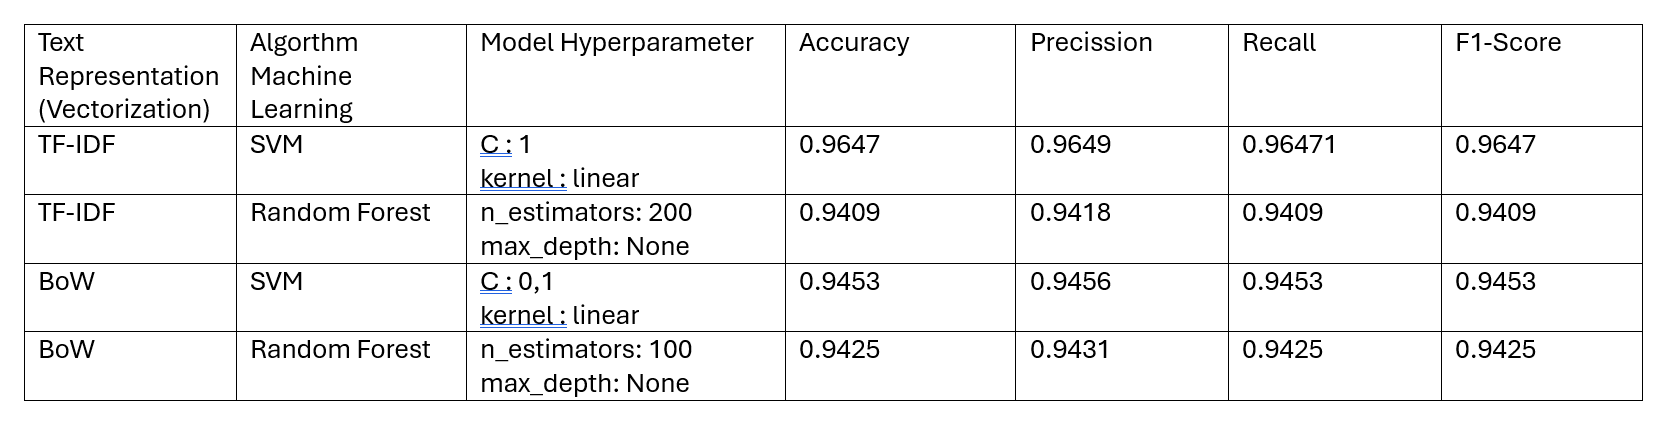

Analisis performance:


1. Model SVM dengan kernel linear menunjukkan kinerja yang sangat baik pada kedua representasi teks. Hal ini mengindikasikan bahwa SVM dengan kernel linear cocok untuk masalah klasifikasi teks dengan dataset C ini.

2. Model Random Forest juga memberikan hasil yang baik. Namun hasil kinerja Random Forest sedikit lebih rendah dibandingkan SVM.


- Hyperparameter:

1. Nilai C pada SVM mempengaruhi tingkat regularisasi. Nilai C yang lebih tinggi mengindikasikan model yang lebih kompleks. Namun dari analisa melalui gridsearch, meskipun nilai C rendah jika dikombinasikan dengan kernel yang tepat bisa memberikan hasil yang cukup optimal.

2. n_estimators dan max_depth pada Random Forest, melalui modeling yang saya lakukan tadi selama trainin jumlah estimator dan kedalaman maksimum pohon memengaruhi kompleksitas model. Semakin banyak estimator dan semakin dalam pohon, model cenderung lebih kompleks.

- Kesimpulan
1. SVM secara umum memberikan hasil  lebih baik daripada Random Forest, untuk masing-masing algorthma tersebut, tuning hyperparameter juga sangat berpengaruh terhadap hasil yang didapatkan.

2. Hasil terbaik didapatkan dengan menggunakan teknik TF-IDF untuk representasi text/vektorisasi dengan algoritma SVM(Support vector machine) dengan tuning hyperparameter (C=1 dan kernel = linear)

### **d. Video penjelasan No 2**

Link Video No 2: https://drive.google.com/file/d/1Z57qxy97CunW9UWIUDP9Fp_Tb2fP9tgH/view?usp=sharing